In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Oct 24 14:29:31 2022

@author: samy
"""

import shap
from shap.plots import waterfall, beeswarm


import time
import copy
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import model_train as mt
from sklearn.tree import DecisionTreeClassifier 

import pickle
import matplotlib.pyplot as plt


from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
from transformers import (AdamW, 
                          get_linear_schedule_with_warmup,
                          set_seed)

import shap
from shap.plots import text
from sklearn.metrics import classification_report
import copy

In [2]:
"""
load pickle data file
"""
def load_pickle(path_file):
    with open(path_file, 'rb') as file:
        data = pickle.load(file)
    return data

# ####################################################################################################################################

In [3]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap by topic (1 C and 1 NC)/shap_temp_TEST_pelosi.pickle'
p2 = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap by topic (1 C and 1 NC)/shap_temp_TEST_pelosi_10k.pickle'
shap_valuesC, samp_X, samp_y, c1_id_tweet, c1_sample_idx, tweet_c1, outputs, val, samp_X_list = load_pickle(p2)
# shap_valuesC, samp_X, samp_y, c1_id_tweet, c1_sample_idx, tweet_c1, outputs, val, samp_X_list = load_pickle(p)

In [4]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [1] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.86      0.92     10001

    accuracy                           0.86     10001
   macro avg       0.50      0.43      0.46     10001
weighted avg       1.00      0.86      0.92     10001

1421 vs 8580


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [5]:
shap_values_TEMP_GOOD = copy.deepcopy(shap_valuesC)

old_v = shap_values_TEMP_GOOD.values
old_b = shap_values_TEMP_GOOD.base_values
old_d = shap_values_TEMP_GOOD.data

new_v = np.delete(old_v, bad_preds)
new_b = np.delete(old_b, bad_preds)
new_d = np.delete(old_d, bad_preds)
new_d = tuple(new_d)

shap_values_TEMP_GOOD.values = new_v
shap_values_TEMP_GOOD.base_values = new_b
shap_values_TEMP_GOOD.data = new_d

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


In [67]:
from scipy.special import expit, logit

r = [x[0] for x in val if(x[0] > 0)]
r = [expit(x) for x in r]
print(sum(r)/len(r))
r = [x[0] for x in val if(x[0] < 0)]
r = [expit(x) for x in r]
sum(r)/len(r)

#r = [x for x in outputs[:,:,0] if(x > 0.5)]
#sum(r)/len(r)

0.9999999990000099


1.0000000000000081e-09

In [40]:
len(shap_valuesC.base_values)

3001

In [7]:
shap_values_TEMP_BAD = copy.deepcopy(shap_valuesC)

old_v = shap_values_TEMP_BAD.values
old_b = shap_values_TEMP_BAD.base_values
old_d = shap_values_TEMP_BAD.data

new_v = np.delete(old_v, good_preds)
new_b = np.delete(old_b, good_preds)
new_d = np.delete(old_d, good_preds)
new_d = tuple(new_d)

shap_values_TEMP_BAD.values = new_v
shap_values_TEMP_BAD.base_values = new_b
shap_values_TEMP_BAD.data = new_d

In [69]:
shap_valuesC[0]

.values =
array([  0.        ,   0.        ,   0.        ,   0.        ,
        10.36163293, -31.08489878, -31.08489878,  10.36163293,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ])

.base_values =
20.723265864228342

.data =
array(['', ' pe', 'los', 'i', ' the', ' great', ' catholic', ' who',
       ' supports', ' late', ' term', ' abortion', ' murder', ' .', ' ur',
       'l', ''], dtype='<U9')

In [68]:
# 0.000000001 (if t==0 or t==1)
f = plt.figure()
text(shap_valuesC[0])

<Figure size 432x288 with 0 Axes>

In [10]:
#p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap by topic (1 C and 1 NC)/shap_temp_TEST_messicumple.pickle'
#shap_valuesNC, samp_X, samp_y, c0_id_tweet, c0_sample_idx, tweet_c0, outputs, val, samp_X_list = load_pickle(p)
#f = plt.figure()
#text(shap_valuesNC[c0_sample_idx])

# ########################################################## TEST SET

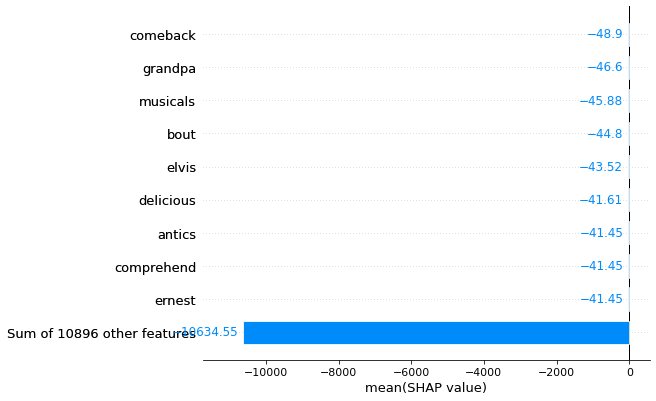

In [5]:
shap.plots.bar(shap_valuesC.mean(0))

   ---- (BERT) (TEST) (all) min [GOOD] ----


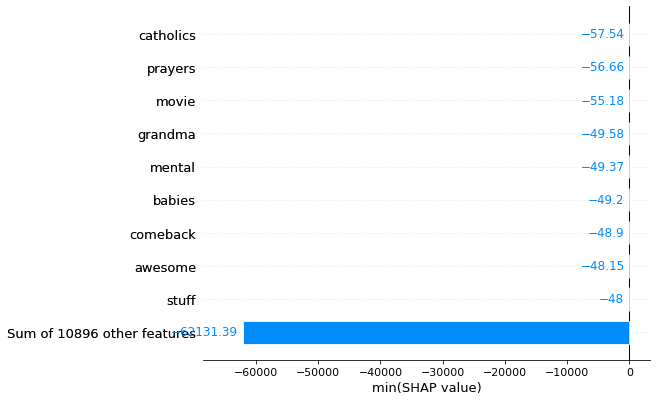

   ---- (BERT) (TEST) (all) max [GOOD] ----


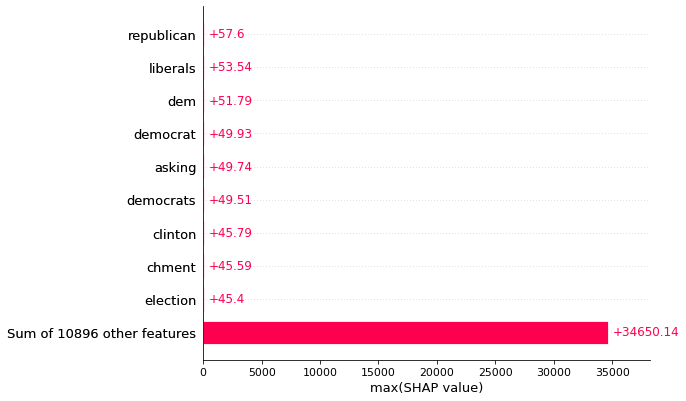

In [4]:
print('   ---- (BERT) (TEST) (all) min [GOOD] ----')
shap.plots.bar(shap_valuesC.min(0))
print('   ---- (BERT) (TEST) (all) max [GOOD] ----')
shap.plots.bar(shap_valuesC.max(0), order=shap.Explanation.identity)

   ---- (BERT) (TEST) (good_preds) mean ----


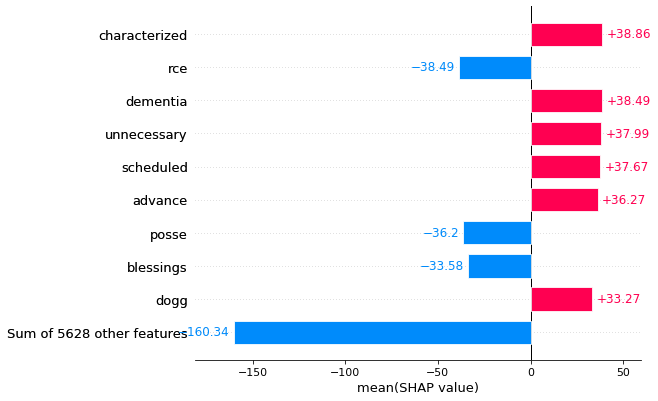

In [97]:
print('   ---- (BERT) (TEST) (good_preds) mean ----')
shap.plots.bar(shap_values_TEMP_GOOD.mean(0))

   ---- (BERT) (TEST) (bad_preds) mean ----


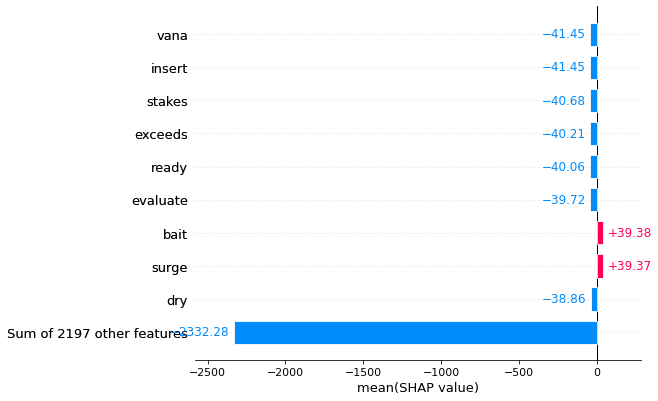

In [100]:
print('   ---- (BERT) (TEST) (bad_preds) mean ----')
shap.plots.bar(shap_values_TEMP_BAD.mean(0))

# ########################################  MANUAL TEST

In [87]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap_train_and_manual_test/shap_temp_MANUAL_TEST_pelosi.pickle'
shap_valuesMTEST, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

In [88]:
outputs = np.stack(outputs)
preds = outputs.argmax(axis=-1)
lab = [1] * len(preds)
print(classification_report(lab, preds))

bad_preds = []
good_preds = []
cpt=0
for p in preds:
    if(p==0):
        bad_preds.append(cpt)
    else:
        good_preds.append(cpt)
    cpt+=1
print(len(bad_preds), 'vs', len(good_preds))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.87      0.93       193

    accuracy                           0.87       193
   macro avg       0.50      0.43      0.46       193
weighted avg       1.00      0.87      0.93       193

26 vs 167


Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [90]:
shap_values_M = copy.deepcopy(shap_valuesMTEST)

old_v = shap_values_M.values
old_b = shap_values_M.base_values
old_d = shap_values_M.data

new_v = []
new_b = []
new_d = []
error = 0
for v, b, d in zip(old_v, old_b, old_d):
    s = sum(v)
    if(s < -1 or s > 1):
        error+=1
    else:
        new_v.append(v)
        new_b.append(b)
        new_d.append(d)
print('error:', error)

shap_values_M.values = np.array(new_v)
shap_values_M.base_values = np.array(new_b)
shap_values_M.data = np.array(new_d)

error: 25


Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


   ---- (BERT) (MANUAL TEST) (all) mean PELOSI (removed bad values)----


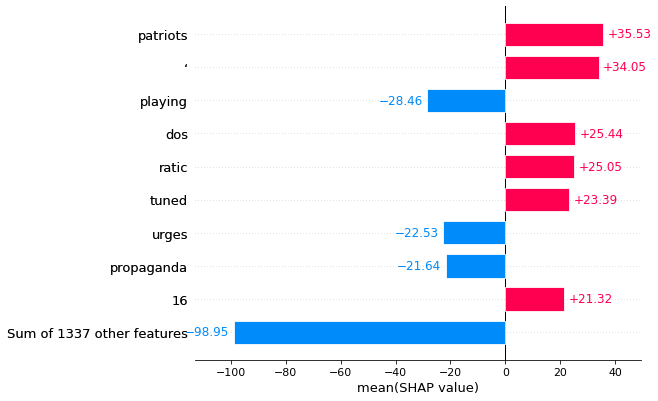

In [94]:
print('   ---- (BERT) (MANUAL TEST) (all) mean PELOSI (removed bad values)----')
shap.plots.bar(shap_values_M.mean(0))

# ############################################## TRAIN

In [3]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap_train_and_manual_test/shap_temp_TRAIN_impeachment-5-10.pickle'
shap_valuesTRAIN_imp, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

   ---- (BERT) (TEST) (all) mean roussef impeachment----


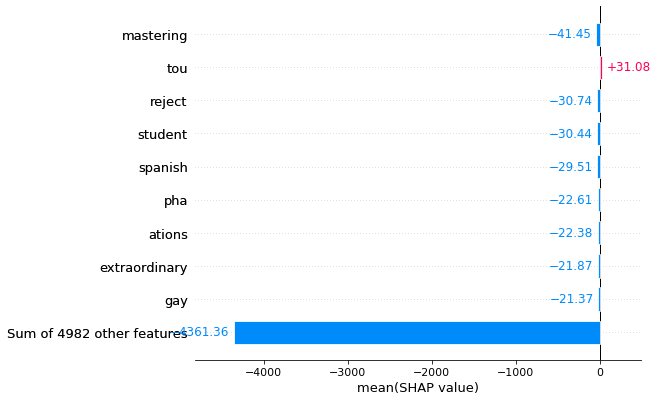

In [4]:
print('   ---- (BERT) (TEST) (all) mean roussef impeachment----')
shap.plots.bar(shap_valuesTRAIN_imp.mean(0))

In [5]:
p = '/data/DEV_DATA/TWITTER API/other/data_complete_vaccine_chloro/data/data_objects/ANALYSIS/controversy_LABEL/bert_text (on TEST)/shap_train_and_manual_test/shap_temp_TRAIN_kavanaugh16.pickle'
shap_valuesTRAIN_kav, samp_X, samp_y, outputs, val, samp_X_list = load_pickle(p)

   ---- (BERT) (TRAIN) (all) mean kavanaugh ----


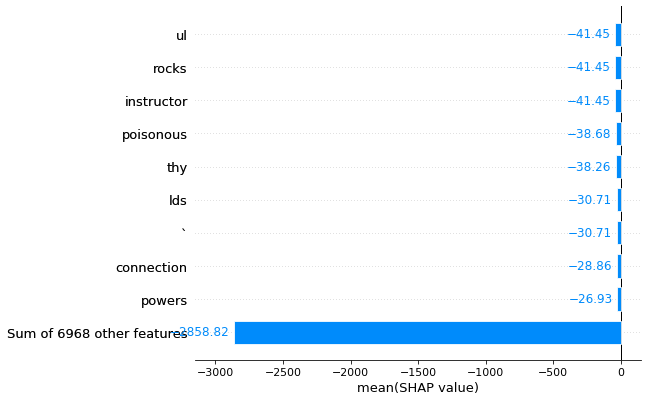

In [6]:
print('   ---- (BERT) (TRAIN) (all) mean kavanaugh ----')
shap.plots.bar(shap_valuesTRAIN_kav.mean(0))